In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')
import sqlite3
import csv
import mysql.connector

In [11]:
pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     -------------------------------------- 14.2/14.2 MB 271.5 kB/s eta 0:00:00
     ------------------------------------ 527.0/527.0 kB 341.1 kB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.3
    Uninstalling protobuf-4.24.3:
      Successfully uninstalled protobuf-4.24.3


# Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [2]:
df=pd.read_csv("D:\\sahil\\project data trained\\India_Crime - Copy\\India_Crime - Copy\\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [6]:
db=sqlite3.connect('crime_database.db')
cursor=db.cursor()
cursor.execute("CREATE TABLE crime_against_women(State_UT text, District text, Year int, Rape int, Kidnapping_abduction int, Dowry_Deaths int,Assault_on_women_with_intent_to_outrage_her_modesty int,Insult_to_modesty_of_Women int,Cruelty_by_Husband_or_His_Relatives int,Importation_of_Girls int)")

In [7]:
with open("D:\\sahil\\project data trained\\India_Crime - Copy\\India_Crime - Copy\\42_District_wise_crimes_committed_against_women_2001_2012.csv") as file:
    no_records=0
    for row in file:
        cursor.execute('INSERT INTO Crime_against_women VALUES(?,?,?,?,?,?,?,?,?,?)',row.split(','))
        db.commit()
        no_records +=1

print(no_records,"record(s) printed")

9018 record(s) printed


We have inserted all the details into our Crimes_against_women table

# 3.2) Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.

In [8]:
result=cursor.execute("SELECT State_UT, District, Year, Rape, Kidnapping_abduction FROM Crimes_against_women WHERE District NOT LIKE '%Total%'ORDER BY (Rape + Kidnapping_abduction) DESC LIMIT 1;")
result.fetchall()

[('"WEST BENGAL"', '"MURSHIDABAD"', 2010, 526, 441)]

As we can see West Bengal's Murshidabad is the district with highest number of rapes and kidnappings combined that happened in the year 2010

# 3.3)	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year 

In [9]:
result=cursor.execute("SELECT State_UT, District, Year, Rape, Kidnapping_abduction FROM Crime_against_women WHERE ( Rape, Kidnapping_abduction) IN ( SELECT MIN(Rape) AS Lowest_Rape,MIN(Kidnapping_abduction) AS Lowest_Kidnapping FROM Crimes_against_women WHERE District NOT LIKE '%Total%')")
result.fetchall()

[('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"SECUNDERABAD RLY."', 2001, 0, 0),
 ('"ASSAM"', '"C.I.D."', 2001, 0, 0),
 ('"BIHAR"', '"ARWAL"', 2001, 0, 0),
 ('"CHHATTISGARH"', '"GRP RAIPUR"', 2001, 0, 0),
 ('"HIMACHAL PRADESH"', '"G.R.P."', 2001, 0, 0),
 ('"JAMMU & KASHMIR"', '"CRIME JAMMU"', 2001, 0, 0),
 ('"JAMMU & KASHMIR"', '"CRIME SRINAGAR"', 2001, 0, 0),
 ('"JAMMU & KASHMIR"', '"RAILWAYS"', 2001, 0, 0),
 ('"MADHYA PRADESH"', '"JABALPUR RLY."', 2001, 0, 0),
 ('"MAHARASHTRA"', '"PUNE RLY."', 2001, 0, 0),
 ('"MANIPUR"', '"SENAPATI"', 2001, 0, 0),
 ('"MANIPUR"', '"TAMENGLONG"', 2001, 0, 0),
 ('"MIZORAM"', '"MAMIT"', 2001, 0, 0),
 ('"NAGALAND"', '"KIPHIRE"', 2001, 0, 0),
 ('"NAGALAND"', '"PEREN"', 2001, 0, 0),
 ('"NAGALAND"', '"TUENSANG"', 2001, 0, 0),
 ('"PUNJAB"', '"G.R.P"', 2001, 0, 0),
 ('"SIKKIM"', '"NORTH"', 2001, 0, 0),
 ('"TAMIL NADU"', '"CHENNAI RLY."', 2001, 0, 0),
 ('"TAMIL NADU"', '"TRICHY RLY."', 2001, 0, 0),
 ('"WEST BENGAL"', '"ASANSOL"', 

We have found all the states with their corresponding districts with the lowest value that is 0 cases combined for rape and kidnapping.

# 3.4 ) Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [11]:
df1=pd.read_csv("D:\\sahil\\project data trained\\India_Crime - Copy\\India_Crime - Copy\\02_District_wise_crimes_committed_against_ST_2001_2012.csv")
df1

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [12]:
cursor.execute("CREATE TABLE crime_against_st (state_UT TEXT,District TEXT,Year INT,Murder INT,Rape INT,Kidanpping_abduction INT, Dacoity int, Roberry int, Arson int, Hurt int, Protection of Civil Rights Act int, Prevention of atrocities Act int, Other Crimes Against STs int)")

In [13]:
with open("D:\\sahil\\project data trained\\India_Crime - Copy\\India_Crime - Copy\\02_District_wise_crimes_committed_against_ST_2001_2012.csv") as file:
    no_records=0
    for row in file:
        cursor.execute('INSERT INTO crime_against_st VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)',row.split(','))
        db.commit()
        no_records +=1

print(no_records,"record(s) printed")

9019 record(s) printed


# 3.5)	Write SQL query to find the highest number of dacoity/robbery in which district.

In [14]:
result=cursor.execute("SELECT state_UT, District,Year, MAX(Dacoity) AS Highest_Dacoity FROM crime_against_st GROUP BY state_UT, District, Year ORDER BY Highest_Dacoity DESC LIMIT 2")
result.fetchall()

[('"STATE/UT"', '"DISTRICT"', '"Year"', '"Dacoity"'),
 ('"GUJARAT"', '"DAHOD"', 2004, 29)]

As we can see highest cases of dacoity occured in Dahod district of Gujarat against ST's in the year 2004.

# 3.6)	Write SQL query to find in which districts(All) the lowest number of murders happened

In [15]:
result=cursor.execute("SELECT State_UT, District, Year, Rape, Murder FROM crime_against_st WHERE (Murder) IN ( SELECT MIN(Murder) AS Lowest_murder FROM crime_against_st WHERE District NOT LIKE '%Total%')")
result.fetchall()

[('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 1, 0),
 ('"ANDHRA PRADESH"', '"ANANTAPUR"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"CHITTOOR"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"CUDDAPAH"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"EAST GODAVARI"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"GUNTUR"', 2001, 2, 0),
 ('"ANDHRA PRADESH"', '"HYDERABAD CITY"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"KARIMNAGAR"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"KRISHNA"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"KURNOOL"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"MEDAK"', 2001, 1, 0),
 ('"ANDHRA PRADESH"', '"NIZAMABAD"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"PRAKASHAM"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"RANGA REDDY"', 2001, 2, 0),
 ('"ANDHRA PRADESH"', '"SECUNDERABAD RLY."', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"SRIKAKULAM"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"VIJAYAWADA"', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"VIJAYAWADA RLY."', 2001, 0, 0),
 ('"ANDHRA PRADESH"', '"VISAKHA 

Here is the list of all the districts where Murder against ST happened the lowest

# 3.7) Write SQL query to find the number of murders in ascending order in district and yearwise.

In [16]:
result=cursor.execute("SELECT state_UT, DISTRICT, Year,Murder FROM crime_against_st GROUP BY DISTRICT ORDER BY Murder ASC, Year ASC")
result.fetchall()

[('"WEST BENGAL"', '"24 PARGANAS NORTH"', 2001, 0),
 ('"WEST BENGAL"', '"24 PARGANAS SOUTH"', 2001, 0),
 ('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 0),
 ('"UTTAR PRADESH"', '"AGRA"', 2001, 0),
 ('"GUJARAT"', '"AHMEDABAD COMMR."', 2001, 0),
 ('"GUJARAT"', '"AHMEDABAD RURAL"', 2001, 0),
 ('"GUJARAT"', '"AHWA-DANG"', 2001, 0),
 ('"MIZORAM"', '"AIZAWL"', 2001, 0),
 ('"RAJASTHAN"', '"AJMER"', 2001, 0),
 ('"MAHARASHTRA"', '"AKOLA"', 2001, 0),
 ('"KERALA"', '"ALAPUZHA"', 2001, 0),
 ('"UTTAR PRADESH"', '"ALLAHABAD"', 2001, 0),
 ('"UTTARAKHAND"', '"ALMORA"', 2001, 0),
 ('"RAJASTHAN"', '"ALWAR"', 2001, 0),
 ('"HARYANA"', '"AMBALA"', 2001, 0),
 ('"UTTAR PRADESH"', '"AMBEDKAR NAGAR"', 2001, 0),
 ('"MAHARASHTRA"', '"AMRAVATI COMMR."', 2001, 0),
 ('"MAHARASHTRA"', '"AMRAVATI RURAL"', 2001, 0),
 ('"GUJARAT"', '"AMRELI"', 2001, 0),
 ('"PUNJAB"', '"AMRITSAR"', 2001, 0),
 ('"GUJARAT"', '"ANAND"', 2001, 0),
 ('"ANDHRA PRADESH"', '"ANANTAPUR"', 2001, 0),
 ('"JAMMU & KASHMIR"', '"ANANTNAG"', 2001, 0),
 ('"A 

# 3.8.1)	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [17]:
cursor.execute("CREATE TABLE district_wise_IPC_crimes (state_UT TEXT,District TEXT,Year INT,Murder INT, Attempt murder INT, Rape INT)")

In [21]:
with open("D:\\sahil\\project data trained\\India_Crime - Copy\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv") as file:
    no_records=0
    for row in file:
        cursor.execute('INSERT INTO district_wise_IPC_crimes VALUES(?,?,?,?,?,?)',row.split(','))
        db.commit()
        no_records +=1

print(no_records,"record(s) printed")

9018 record(s) printed


# 3.8.2)	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [22]:
result = cursor.execute("SELECT state_UT, Year, DISTRICT, MAX(MURDER) AS Highest_Murder FROM district_wise_IPC_crimes WHERE NOT DISTRICT = 'TOTAL' GROUP BY state_ut, Year")
rows=result.fetchall()
rows

[('A & N ISLANDS', 2001, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2002, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2003, 'ANDAMAN', 16),
 ('A & N ISLANDS', 2004, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2005, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2006, 'ANDAMAN', 3),
 ('A & N ISLANDS', 2007, 'A and N ISLANDS', 15),
 ('A & N ISLANDS', 2008, 'ANDAMAN', 8),
 ('A & N ISLANDS', 2009, 'ANDAMAN', 15),
 ('A & N ISLANDS', 2010, 'ANDAMAN', 8),
 ('A & N ISLANDS', 2011, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2012, 'SOUTH', 8),
 ('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214),
 ('ANDHRA PRADESH', 2002, 'RANGA REDDY', 214),
 ('ANDHRA PRADESH', 2003, 'GUNTUR', 210),
 ('ANDHRA PRADESH', 2004, 'MAHABOOBNAGAR', 183),
 ('ANDHRA PRADESH', 2005, 'MAHABOOBNAGAR', 212),
 ('ANDHRA PRADESH', 2006, 'CYBERABAD', 193),
 ('ANDHRA PRADESH', 2007, 'CYBERABAD', 186),
 ('ANDHRA PRADESH', 2008, 'CYBERABAD', 197),
 ('ANDHRA PRADESH', 2009, 'CYBERABAD', 186),
 ('ANDHRA PRADESH', 2010, 'CYBERABAD', 187),
 ('ANDHRA PRADESH', 2011, 'CYBERABAD', 213),
 (

This is the list for each state's district having the most murders yearwise.

# 3.8.3)	Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [23]:
df = pd.DataFrame(rows, columns=['state_UT', 'Year', 'DISTRICT', 'MURDER'])
df

,state_UT,Year,DISTRICT,MURDER
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
416,WEST BENGAL,2008,24 PARGANAS SOUTH,239
417,WEST BENGAL,2009,24 PARGANAS NORTH,229
418,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
419,WEST BENGAL,2011,24 PARGANAS SOUTH,247


We have stored the data in the dataframe 'df'

In [24]:
df['Year'] = pd.to_numeric(df['Year'],errors='coerce')
df['MURDER'] = pd.to_numeric(df['MURDER'],errors='coerce')

In [25]:
district_counts = df['DISTRICT'].value_counts()
selected_districts = district_counts[district_counts >= 3].index
selected_districts

Index(['WEST', 'D and N HAVELI', 'CHANDIGARH', 'LAKSHADWEEP',
       'BANGALORE COMMR.', 'PATNA', 'DAMAN', 'DELHI UT TOTAL', 'AIZAWL',
       'KANGRA', 'NORTH GOA', 'RANCHI', 'HARIDWAR', 'DIMAPUR', 'ANDAMAN',
       'SURAT COMMR.', 'CHENNAI', 'EAST', 'JAINTIA HILLS', 'LOHIT',
       '24 PARGANAS NORTH', 'MUMBAI COMMR.', 'PONDICHERRY', 'CYBERABAD',
       'INDORE', 'JHABUA', 'ALWAR', 'BILASPUR', 'BARAMULLA', 'MUMBAI',
       'MAYURBHANJ', 'PALAKKAD', 'PUDUCHERRY', 'JALANDHAR', 'GURGAON',
       'MUZAFFARNAGAR', 'TINSUKIA', 'DIBRUGARH', 'KEONJHAR', 'LUDHIANA',
       'BHARATPUR', 'SONIPAT', 'CP LUDHIANA', 'IMPHAL(WEST)', 'SARGUJA',
       'IMPHAL WEST', 'THOUBAL', 'SUNDARGARH', 'AHMEDABAD COMMR.',
       '24 PARGANAS SOUTH', 'KHASI HILLS EAST', 'JAMMU'],
      dtype='object')

These are all the districts which are appearing 3 or more than 3 years 

In [26]:
district_counts = df.groupby(['state_UT', 'DISTRICT']).size().reset_index(name='Count')
sorted_df = district_counts.sort_values(by='Count', ascending=False)
sorted_df

,state_UT,DISTRICT,Count
21,DAMAN & DIU,DAMAN,12
20,D & N HAVELI,D and N HAVELI,12
47,LAKSHADWEEP,LAKSHADWEEP,12
81,TRIPURA,WEST,12
15,CHANDIGARH,CHANDIGARH,12
...,...,...,...
11,ASSAM,KOKRAJHAR,1
8,ARUNACHAL PRADESH,PAPUM PARE,1
4,ANDHRA PRADESH,GUNTUR,1
2,A & N ISLANDS,SOUTH,1


We have sorted the dataframe of districts appearing 3 or more than 3 times in descening order 

# 3.8.4)	Use appropriate graphs to show your data (the result of 3.8.3)

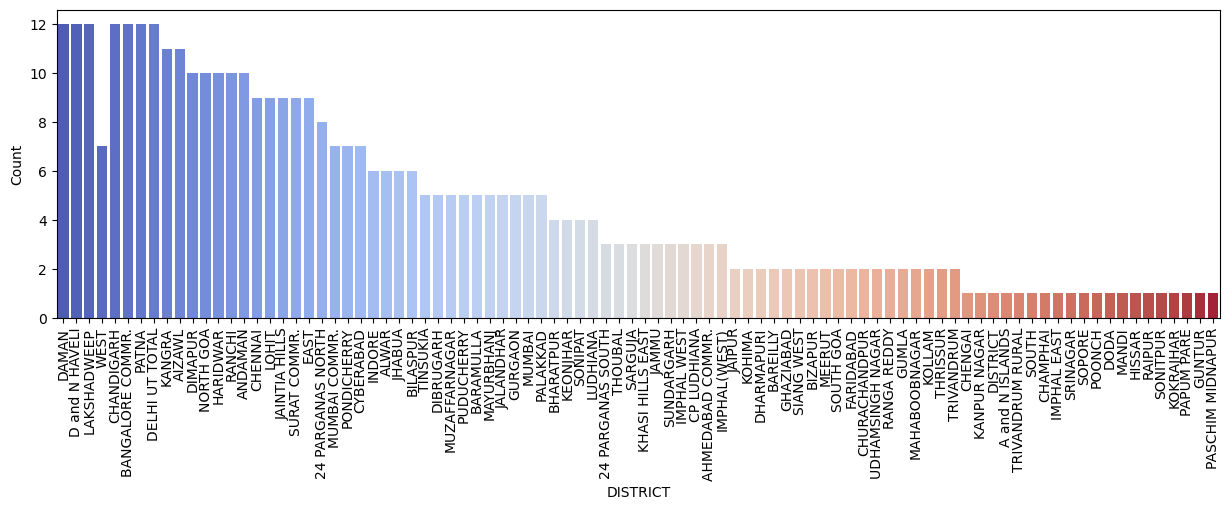

In [27]:
plt.figure(figsize=(15,4))
sns.barplot(data=sorted_df,x='DISTRICT',y='Count',errwidth=0,palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

From above we see that Daman and some other districts were the places that had the most murdere cases respective to their states

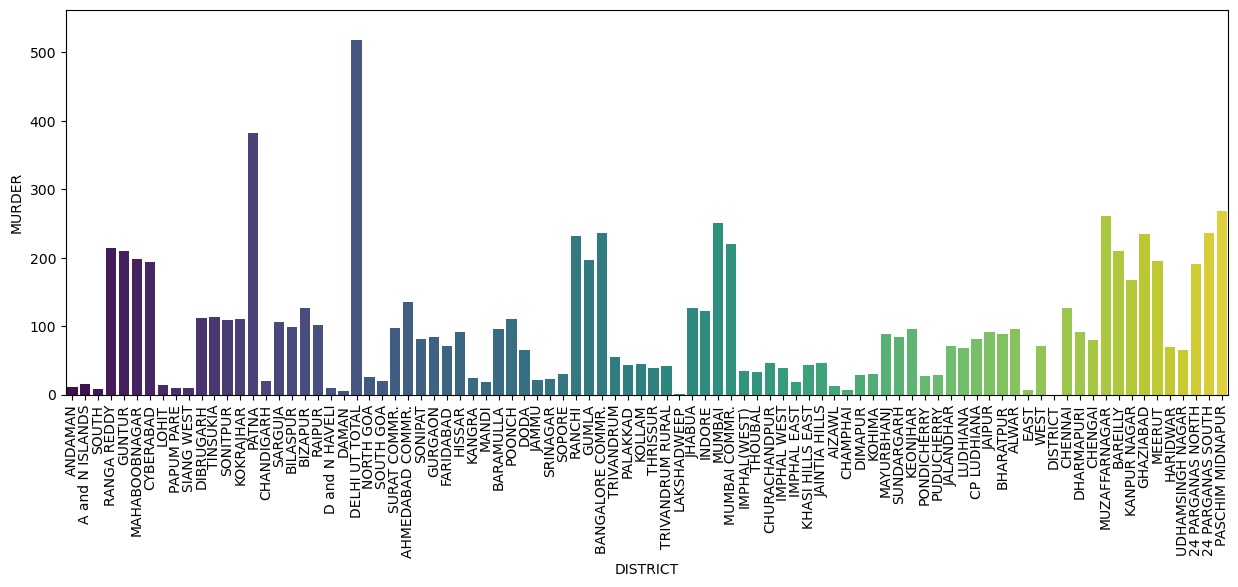

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['DISTRICT'], y=df['MURDER'],errwidth=0,palette='viridis')
plt.xticks(rotation=90)
plt.show()

From above we see that most murders occured in Delhi's total and Patna

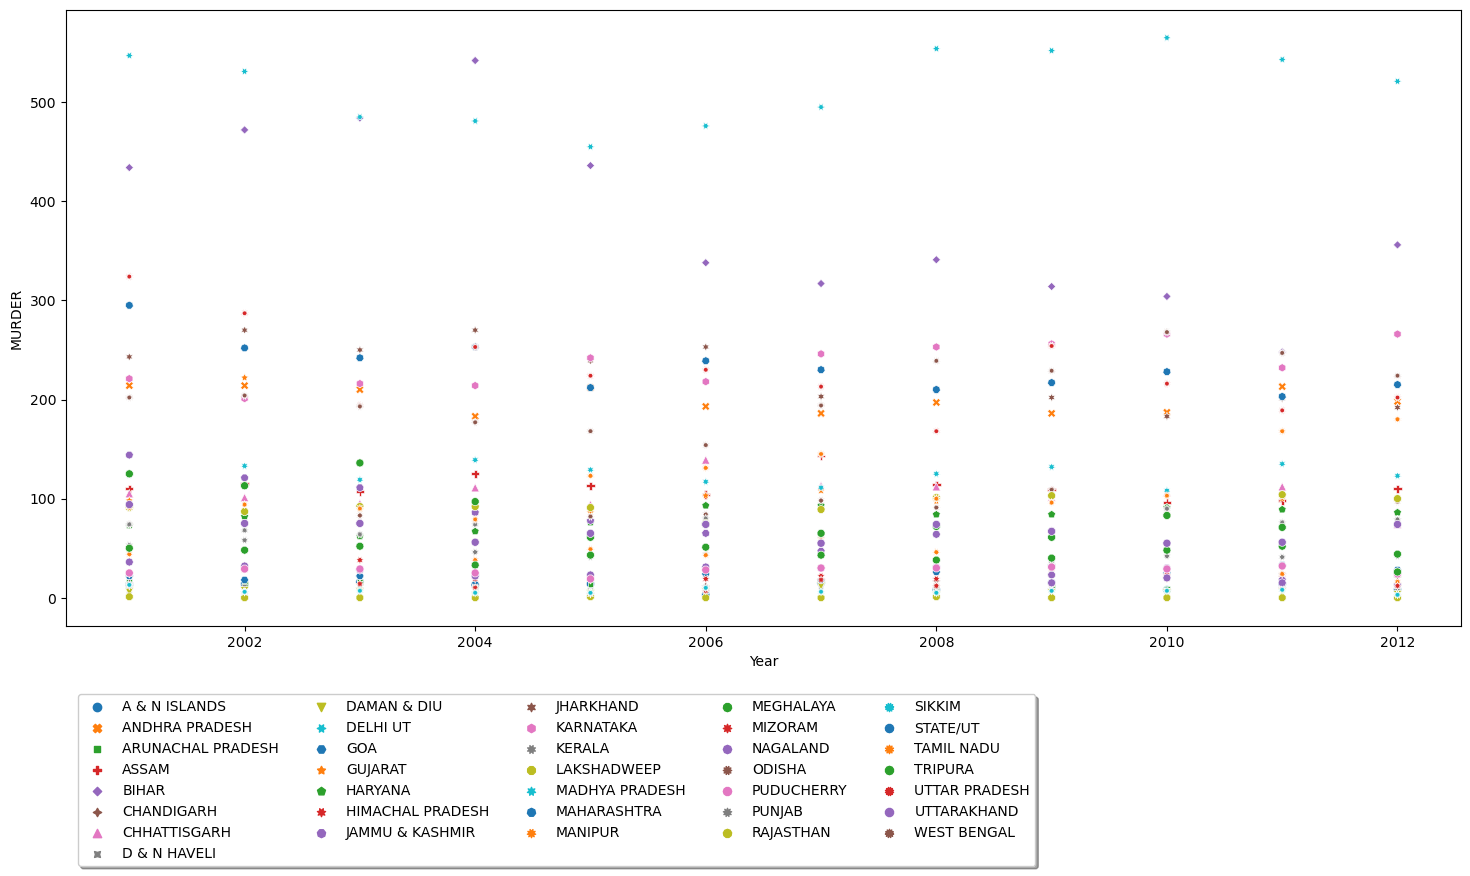

In [29]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='Year',y='MURDER',data=df,hue='state_UT',palette='tab10',style='state_UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From above we see that in every year Delhi UT tops the cahrt with most murders except the year 2004 where Bihar secures the first place.